In [1]:
import pandas as pd
import numpy as np             
import matplotlib.pyplot as plt  
import tensorflow

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None, delimiter=',')

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=df.iloc[:,0:8]
y=df.iloc[:,8]

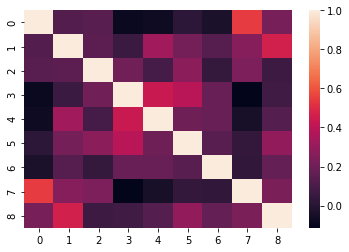

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.show()

In [6]:

from sklearn.model_selection import train_test_split


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.output_shape

(None, 1)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

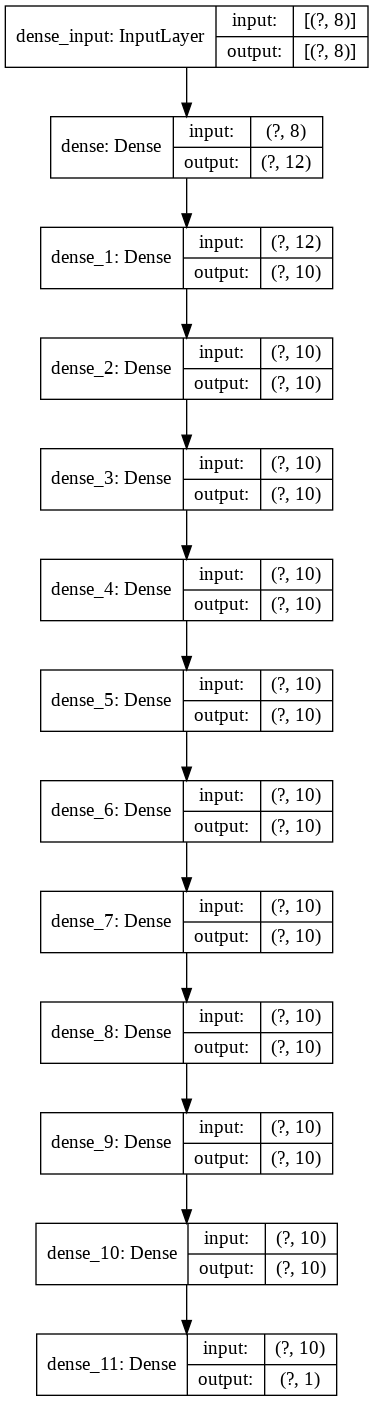

In [10]:
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',show_shapes=True, show_layer_names=True)

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
%%time
History =model.fit(X, y, epochs=50, batch_size=10,validation_split=0.2,verbose=1)

Epoch 1/50
62/62 [==============================] - 3s 43ms/step - loss: 0.6813 - accuracy: 0.6336 - val_loss: 0.6684 - val_accuracy: 0.6494
Epoch 2/50
62/62 [==============================] - 3s 44ms/step - loss: 0.6587 - accuracy: 0.6580 - val_loss: 0.6505 - val_accuracy: 0.6623
Epoch 3/50
62/62 [==============================] - 3s 47ms/step - loss: 0.6384 - accuracy: 0.6498 - val_loss: 0.6312 - val_accuracy: 0.6688
Epoch 4/50
62/62 [==============================] - 3s 45ms/step - loss: 0.6165 - accuracy: 0.6840 - val_loss: 0.6201 - val_accuracy: 0.6688
Epoch 5/50
62/62 [==============================] - 3s 45ms/step - loss: 0.6026 - accuracy: 0.6971 - val_loss: 0.6064 - val_accuracy: 0.6753
Epoch 6/50
62/62 [==============================] - 3s 52ms/step - loss: 0.5840 - accuracy: 0.7052 - val_loss: 0.5877 - val_accuracy: 0.6753
Epoch 7/50
62/62 [==============================] - 3s 45ms/step - loss: 0.5661 - accuracy: 0.7199 - val_loss: 0.5719 - val_accuracy: 0.6753
Epoch 8/50
62

In [13]:
if int(tensorflow.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

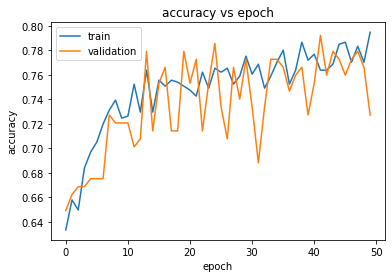

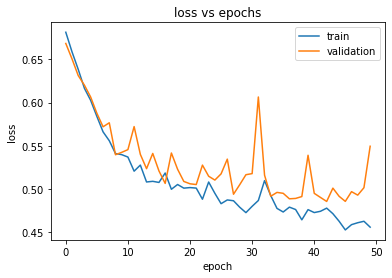

In [14]:
###-----plot accuracy-----------
# plot training accuracy
plt.plot(History.history[acc_key])
# plot validation accuracy
plt.plot(History.history['val_' + acc_key])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(History.history['loss'])
# plot validation loss
plt.plot(History.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

In [15]:
y_pred = model.predict(X_test)

In [16]:
test_loss, test_accuracy= model.evaluate(X_test, y_test,verbose=2)

print('Accuracy on test dataset:', test_accuracy)

5/5 - 0s - loss: 0.5138 - accuracy: 0.7727
Accuracy on test dataset: 0.7727272510528564


In [206]:
##boston
